In [1]:
import sys
main_path = "../../.."
sys.path.append(main_path)

# importing modules
import os
import pickle
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.scripts.common_figures import Figures

In [2]:
figures = Figures()
sns.set_context('poster', font_scale=0.8)

In [3]:
model_scores_path = f"{main_path}/data/processed/model_scores"
os.makedirs(model_scores_path, exist_ok=True)

with open(f"{model_scores_path}/best_scores.pkl", 'rb') as f:
    metric_results = pickle.load(f)
    
with open(f"{model_scores_path}/colonflag_scores.pkl", 'rb') as f:
    cf_metric_results = pickle.load(f)
    
with open(f"{main_path}/config.yaml", 'r') as f:
    config = yaml.safe_load(f)

## Roc Curves For Each Option

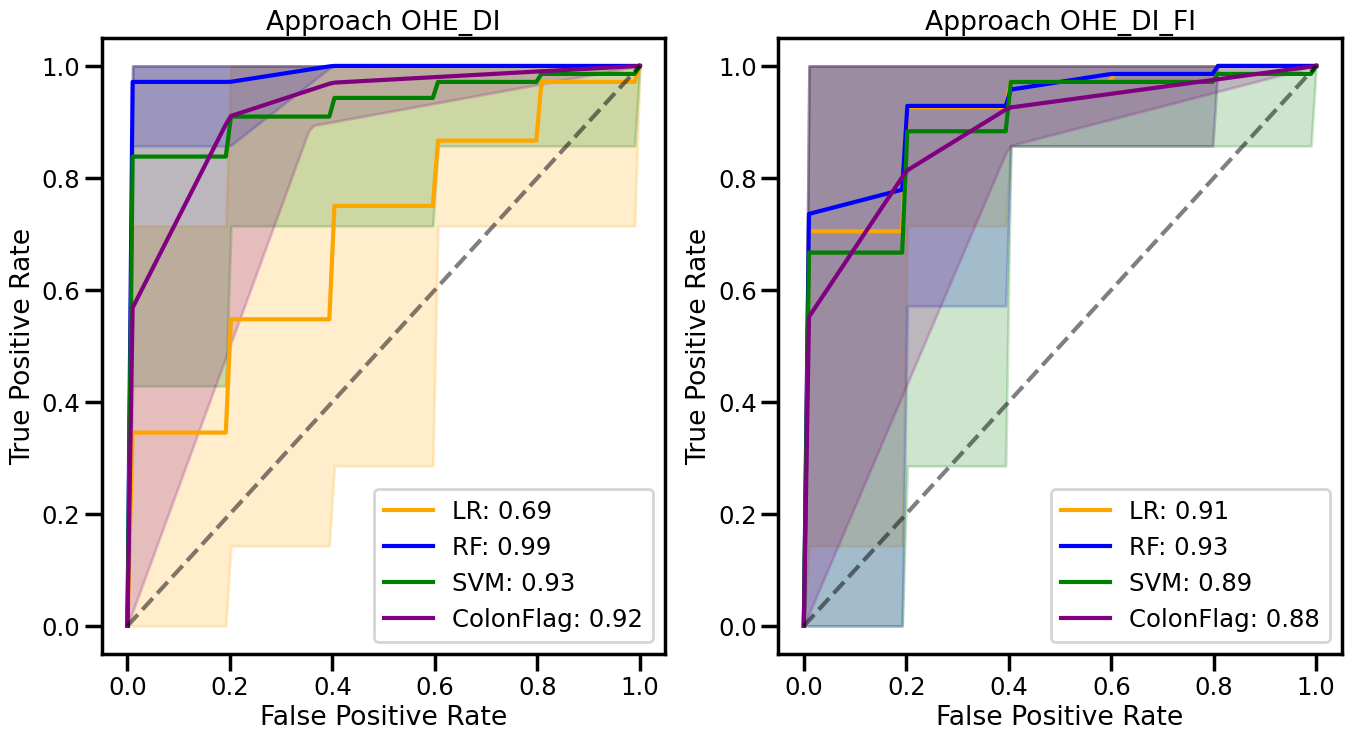

In [4]:
roc_scores = {'ohe_di':[metric_results['ohe_di']['lr']['rocauc'], metric_results['ohe_di']['rf']['rocauc'],
                   metric_results['ohe_di']['svm']['rocauc'], cf_metric_results['ohe_di']['rocauc']],
              'ohe_di_fi':[metric_results['ohe_di_fi']['lr']['rocauc'], metric_results['ohe_di_fi']['rf']['rocauc'],
                   metric_results['ohe_di_fi']['svm']['rocauc'], cf_metric_results['ohe_di_fi']['rocauc']]}

class_names = {'ohe_di':'Approach OHE_DI',
               'ohe_di_fi':'Approach OHE_DI_FI'}

classifier_names = ['LR', 'RF', 'SVM', 'ColonFlag']

save = f"{main_path}/figures/paper_figures/png/roccurves_ohe_di_and_ohe_di_fi.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/roccurves_ohe_di_and_ohe_di_fi.svg"
figures.draw_rocauc_curve(classifier_names, roc_scores, class_names, grid_shape=(1, 2),
                          save=save, paper_figure=paper_figure)

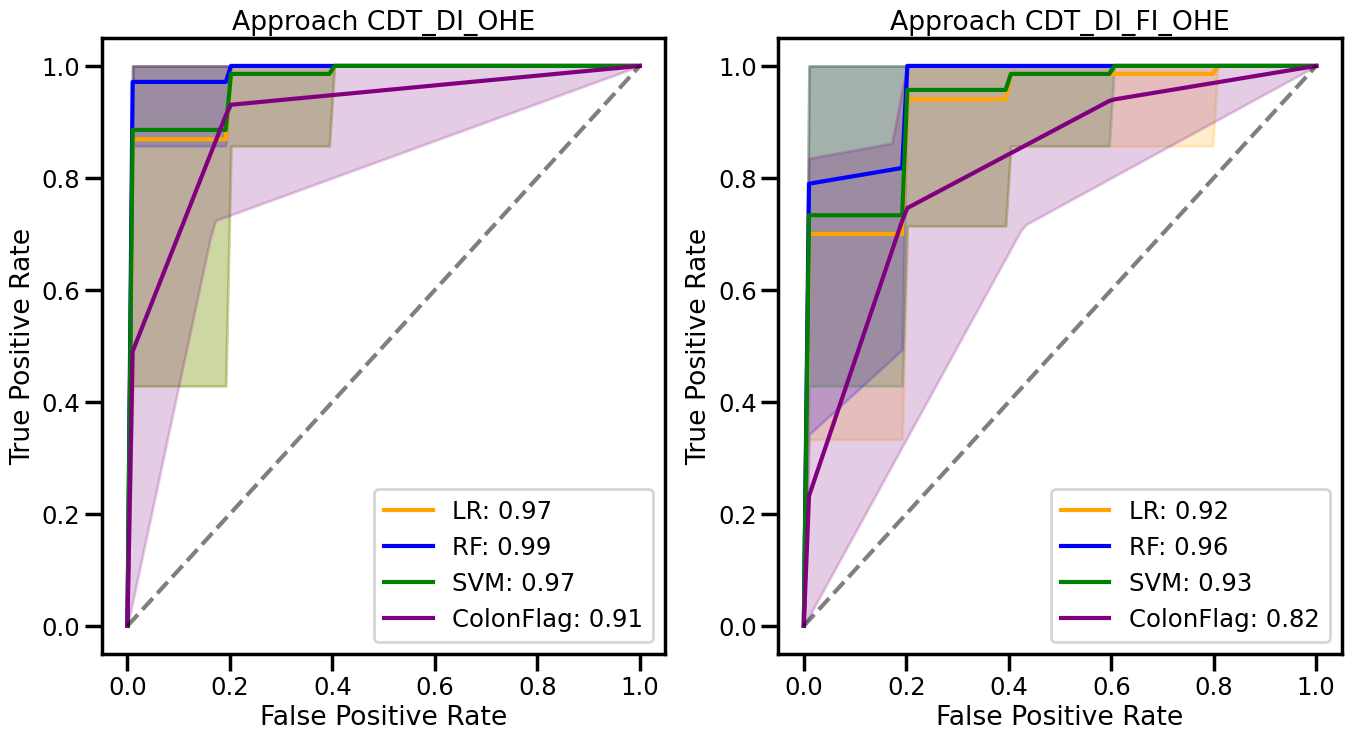

In [5]:
roc_scores = {'cdt_di_ohe':[metric_results['cdt_di_ohe']['lr']['rocauc'], metric_results['cdt_di_ohe']['rf']['rocauc'],
                   metric_results['cdt_di_ohe']['svm']['rocauc'], cf_metric_results['cdt_di_ohe']['rocauc']],
              'cdt_di_fi_ohe':[metric_results['cdt_di_fi_ohe']['lr']['rocauc'], metric_results['cdt_di_fi_ohe']['rf']['rocauc'],
                   metric_results['cdt_di_fi_ohe']['svm']['rocauc'], cf_metric_results['cdt_di_fi_ohe']['rocauc']]}

class_names = {'cdt_di_ohe':'Approach CDT_DI_OHE',
               'cdt_di_fi_ohe':'Approach CDT_DI_FI_OHE'}

classifier_names = ['LR', 'RF', 'SVM', 'ColonFlag']

save = f"{main_path}/figures/paper_figures/png/roccurves_cdt_di_ohe_and_cdt_di_fi_ohe.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/roccurves_cdt_di_ohe_and_cdt_di_fi_ohe.svg"
figures.draw_rocauc_curve(classifier_names, roc_scores, class_names, grid_shape=(1, 2),
                          save=save, paper_figure=paper_figure)

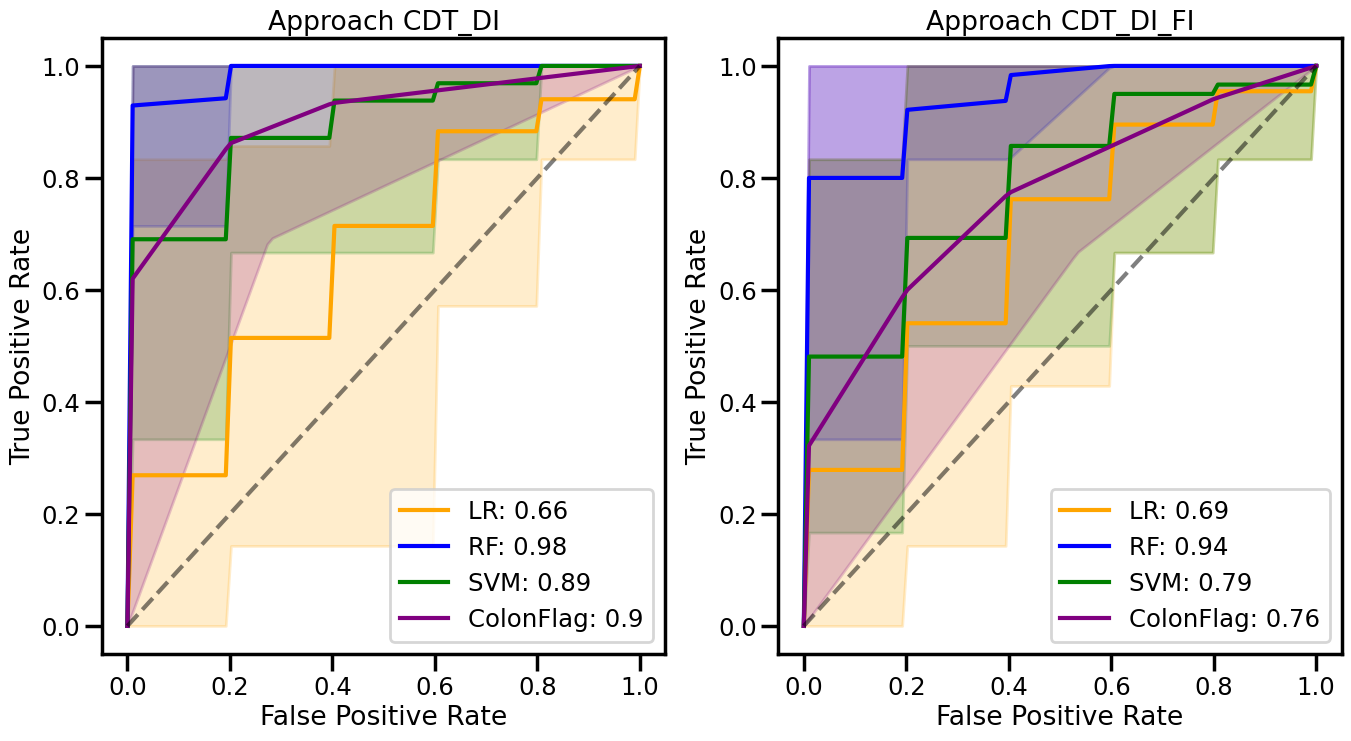

In [6]:
roc_scores = {'cdt_di':[metric_results['cdt_di']['lr']['rocauc'], metric_results['cdt_di']['rf']['rocauc'],
                   metric_results['cdt_di']['svm']['rocauc'], cf_metric_results['cdt_di']['rocauc']],
              'cdt_di_fi':[metric_results['cdt_di_fi']['lr']['rocauc'], metric_results['cdt_di_fi']['rf']['rocauc'],
                   metric_results['cdt_di_fi']['svm']['rocauc'], cf_metric_results['cdt_di_fi']['rocauc']]}

class_names = {'cdt_di':'Approach CDT_DI',
               'cdt_di_fi':'Approach CDT_DI_FI'}

classifier_names = ['LR', 'RF', 'SVM', 'ColonFlag']

save = f"{main_path}/figures/paper_figures/png/roccurves_cdt_di_and_cdt_di_fi.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/roccurves_cdt_di_and_cdt_di_fi.svg"
figures.draw_rocauc_curve(classifier_names, roc_scores, class_names, grid_shape=(1, 2),
                          save=save, paper_figure=paper_figure)

# Final Results

In [7]:
results_df = pd.read_csv(f'{model_scores_path}/approach_model_f1_auc.csv')

with open(f'{model_scores_path}/mean_tprs_comparison.pkl', 'rb') as f:
    mean_tprs = pickle.load(f)
    
mean_fpr = np.linspace(0, 1, 100)

In [8]:
results_df['auc_score_100'] = results_df['auc_score'].apply(lambda x: round(x*100, 2))

results_df['belongs_to'] = np.where(results_df['model'].values == 'CF', "ColonFlag", "Our Best Score")

In [9]:
matching = {}
for idx in range(results_df.shape[0]):
    val = results_df.iloc[idx, 4]
    while val in matching:
        val += 0.0001

    matching[val] = results_df.loc[idx, 'model']
    results_df.iloc[idx, 4] = val

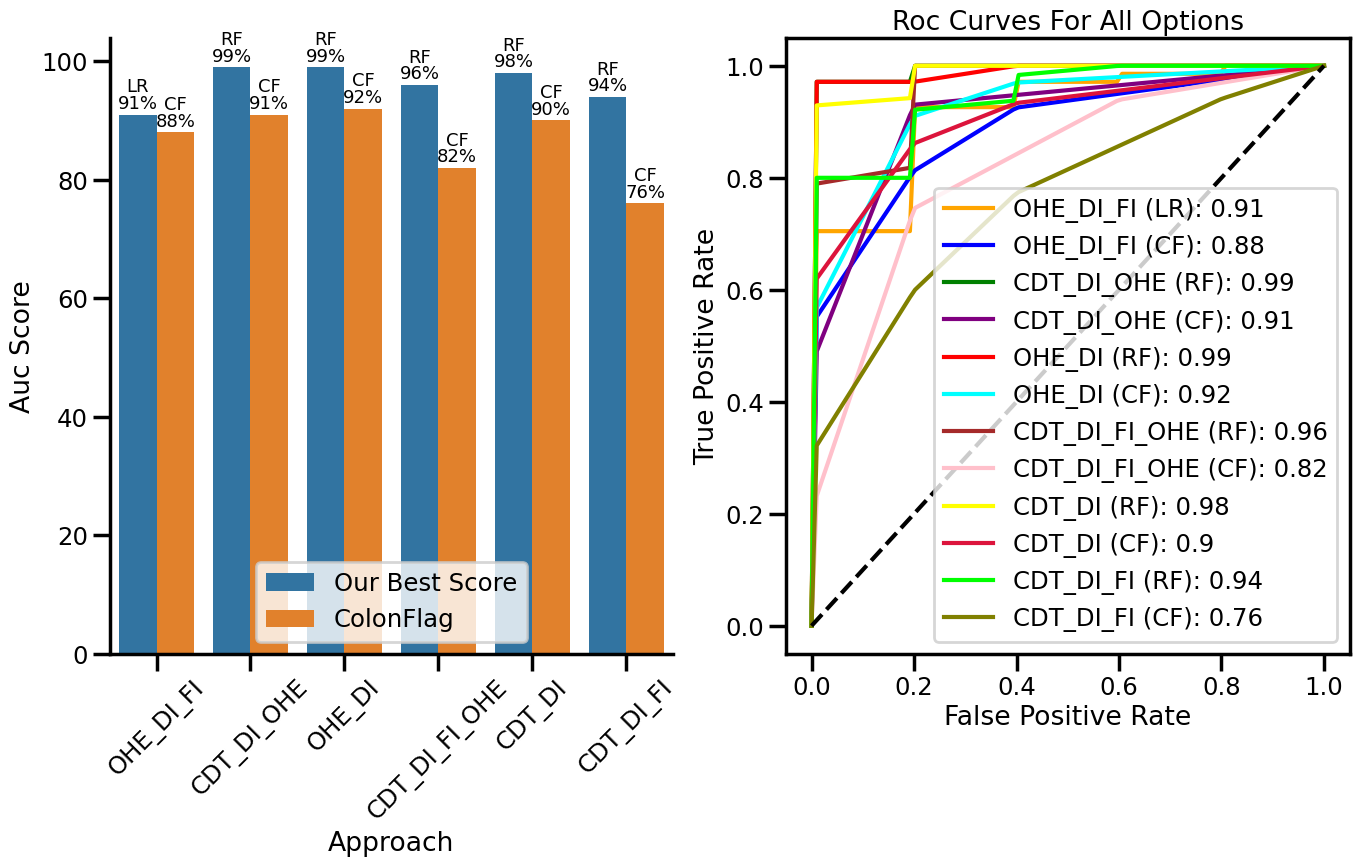

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8*2, 8*1))
clr = ('orange', 'blue', 'green', 'purple', 'red', 'cyan', 'brown', 'pink', 'yellow', 'crimson', 'lime', 'olive')

sns.barplot(data=results_df, x='approach', y='auc_score_100', hue='belongs_to', ax=ax[0])
ax[0].legend(loc="lower center")
ax[0].set_ylabel('Auc Score')
ax[0].set_xlabel('Approach')
ax[0].tick_params('x', labelrotation=45)
ax[0].set_xticklabels(config['approach_names'])

for p in ax[0].patches:
    ax[0].annotate(f"{round(p.get_height())}%",
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')
    
    ax[0].annotate(f"{matching[p.get_height()]}",
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 20),
                   textcoords='offset points')

sns.despine(ax=ax[0])


for (appr, model, auc_score), clor in zip(results_df[['approach', 'model', 'auc_score']].values, clr):
    ax[1].plot(mean_fpr, mean_tprs[appr][model], color=clor, label='{}: {}'.format(f"{appr} ({model})", auc_score))
ax[1].plot([0, 1], [0, 1], color='black', linestyle='--')
ax[1].legend()
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].title.set_text("Roc Curves For All Options")

save = f"{main_path}/figures/paper_figures/png/comparing_all_approaches_with_colonflag.png"
paper_figure = f"{main_path}/figures/paper_figures/svg/comparing_all_approaches_with_colonflag.svg"
plt.savefig(save, dpi=300, bbox_inches='tight')
plt.savefig(paper_figure, bbox_inches='tight')

## Z test

In [11]:
from statsmodels.stats.weightstats import ztest


In [12]:
df_path = f"{main_path}/data/processed/dataframes"
targets = pd.read_csv(f"{df_path}/targets.csv").values.ravel()
results_df_wcf = results_df[results_df['model'] != 'CF']
appr_and_best_models = dict(results_df[['approach', 'model']][results_df['model'] != 'CF'].values.tolist())

In [23]:
def print_scores(appr, our, cf):
    our = round(np.mean(our)*100, 2)
    cf = round(np.mean(cf)*100, 2)

    print(f"{appr:15s} ->", f'{appr_and_best_models[appr]}:', our, "CF:", cf)

In [24]:
z_test_f1 = {'t': {}, 'p': {}}
for appr in config['approach_names']:
    our_f1 = metric_results[appr.lower()][appr_and_best_models[appr].lower()]['f1_scores']
    cf_f1 = cf_metric_results[appr.lower()]['f1_scores']
    print_scores(appr, our_f1, cf_f1)
    
    stat, p_val = ztest(our_f1, cf_f1)

    z_test_f1['p'][appr] = p_val
    z_test_f1['t'][appr] = stat

OHE_DI_FI       -> LR: 87.95 CF: 88.86
CDT_DI_OHE      -> RF: 95.83 CF: 91.44
OHE_DI          -> RF: 93.11 CF: 93.11
CDT_DI_FI_OHE   -> RF: 88.79 CF: 82.58
CDT_DI          -> RF: 93.26 CF: 90.61
CDT_DI_FI       -> RF: 84.39 CF: 76.52


In [25]:
z_test_f1

{'t': {'OHE_DI_FI': -0.22736590177681706,
  'CDT_DI_OHE': 1.2959837764187905,
  'OHE_DI': 0.0,
  'CDT_DI_FI_OHE': 1.985162466458078,
  'CDT_DI': 0.6665759822254322,
  'CDT_DI_FI': 1.5108648818200652},
 'p': {'OHE_DI_FI': 0.8201392324185369,
  'CDT_DI_OHE': 0.19498107431872502,
  'OHE_DI': 1.0,
  'CDT_DI_FI_OHE': 0.04712639872680987,
  'CDT_DI': 0.5050430147729263,
  'CDT_DI_FI': 0.13082287989995903}}

### Auc

In [26]:
z_test_auc = {'t': {}, 'p': {}}
for appr in config['approach_names']:
    our_auc = [i['auc'] for i in metric_results[appr.lower()][appr_and_best_models[appr].lower()]['rocauc']]
    cf_auc = [i['auc'] for i in cf_metric_results[appr.lower()]['rocauc']]
    print_scores(appr, our_auc, cf_auc)
    
    stat, p_val = ztest(our_auc, cf_auc)

    z_test_auc['p'][appr] = p_val
    z_test_auc['t'][appr] = stat

OHE_DI_FI       -> LR: 91.76 CF: 88.64
CDT_DI_OHE      -> RF: 99.43 CF: 91.19
OHE_DI          -> RF: 99.14 CF: 92.5
CDT_DI_FI_OHE   -> RF: 96.07 CF: 81.98
CDT_DI          -> RF: 98.71 CF: 90.64
CDT_DI_FI       -> RF: 94.43 CF: 76.45


In [27]:
z_test_auc

{'t': {'OHE_DI_FI': 0.806410496252074,
  'CDT_DI_OHE': 3.200230258625778,
  'OHE_DI': 3.2533631868519004,
  'CDT_DI_FI_OHE': 4.861722666559956,
  'CDT_DI': 3.0543846062160815,
  'CDT_DI_FI': 3.875488382034436},
 'p': {'OHE_DI_FI': 0.4200061967960458,
  'CDT_DI_OHE': 0.0013731783664826342,
  'OHE_DI': 0.001140476293280409,
  'CDT_DI_FI_OHE': 1.1636858328592804e-06,
  'CDT_DI': 0.002255227549906647,
  'CDT_DI_FI': 0.00010641105717410237}}